In [3]:
# Open and read the contents of the file
import pandas as pd

df = pd.read_csv("A19 -amazonreviews.tsv", sep="\t")
df.head()


,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [4]:
#       Data Cleaning: Remove duplicates, handle missing reviews if any, preprocess text (lowercasing, stopwords removal).

In [5]:
#  Remove duplicate reviews to avoid bias

df.drop_duplicates(inplace=True)

In [6]:
#  Handle missing reviews (rows)

df.dropna(inplace=True)


In [7]:
#  Text preprocessing

#  Lowercase + remove punctuation + stopwords

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()                           # lowercase
    text = re.sub(r'[^a-z\s]', '', text)          # remove punctuation & numbers
    words = text.split()                          # tokenize
    words = [w for w in words if w not in stop_words]  # remove stopwords
    return " ".join(words)

df['clean_review'] = df['review'].astype(str).apply(clean_text)


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [8]:
df[['review','clean_review']].head()

,review,clean_review
0,Stuning even for the non-gamer: This sound tra...,stuning even nongamer sound track beautiful pa...
1,The best soundtrack ever to anything.: I'm rea...,best soundtrack ever anything im reading lot r...
2,Amazing!: This soundtrack is my favorite music...,amazing soundtrack favorite music time hands i...
3,Excellent Soundtrack: I truly like this soundt...,excellent soundtrack truly like soundtrack enj...
4,"Remember, Pull Your Jaw Off The Floor After He...",remember pull jaw floor hearing youve played g...


In [9]:
#          Exploratory Analysis: Word clouds, sentiment distribution, most common positive/negative words.

In [10]:
#!pip install wordcloud

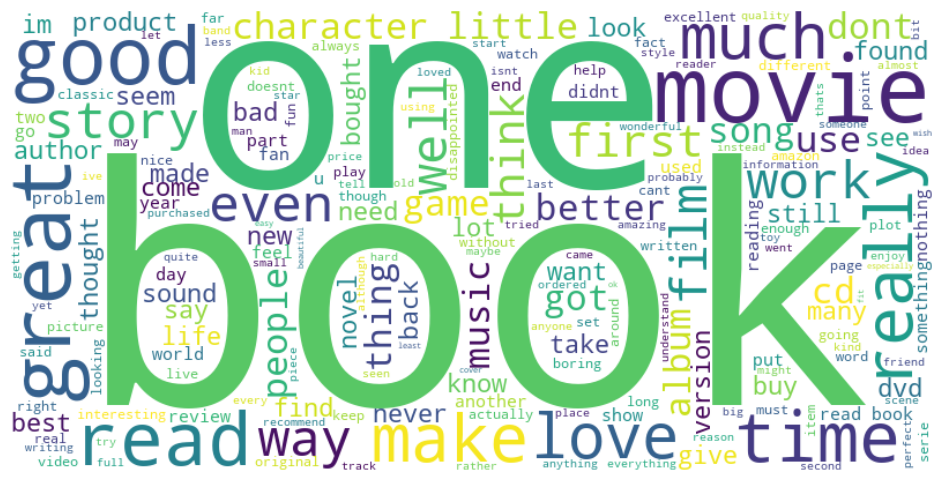

In [11]:
#   Exploratory Analysis
#    1) Word Cloud (overall)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['clean_review'])

wc = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
#   2) Sentiment Distribution

'''
assuming your label column is label
(e.g., Positive / Negative OR 1 / 0)
'''

'\nassuming your label column is label\n(e.g., Positive / Negative OR 1 / 0)\n'

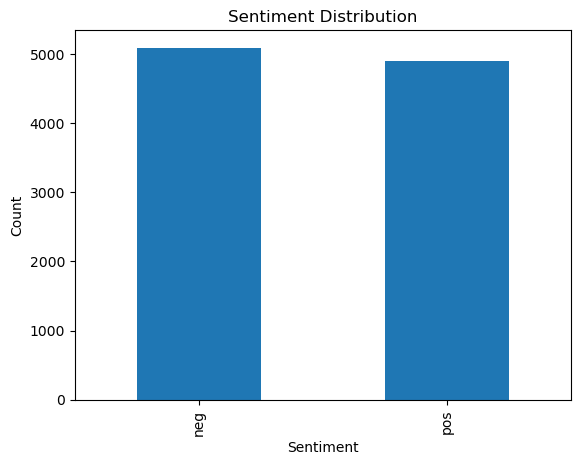

In [13]:
df['label'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [14]:
df['label'].value_counts(normalize=True)

label
neg    0.5097
pos    0.4903
Name: proportion, dtype: float64

In [15]:
#   3) Most Common Words (Positive vs Negative)

#   Split datasets

pos = df[df['label'] == 'pos']['clean_review']
neg = df[df['label'] == 'neg']['clean_review']


In [16]:
#    Word frequency helper

from collections import Counter

def get_top_words(text_series, n=20):
    words = " ".join(text_series).split()
    return Counter(words).most_common(n)



In [18]:
#  Get top words

top_pos = get_top_words(pos)
top_neg = get_top_words(neg)


# Overall most common words in all reviews
all_words = " ".join(df['clean_review']).split()
common_words = Counter(all_words).most_common(10)
print("Overall Most 10 Common Words:\n", common_words)

print("Top Positive Words:\n", top_pos)
print("\nTop Negative Words:\n", top_neg)


Overall Most 10 Common Words:
 [('book', 6497), ('one', 3857), ('like', 2815), ('good', 2769), ('read', 2740), ('great', 2719), ('movie', 2550), ('would', 2381), ('get', 1932), ('time', 1905)]
Top Positive Words:
 [('book', 3313), ('great', 2087), ('one', 1835), ('good', 1635), ('read', 1553), ('like', 1268), ('movie', 1085), ('would', 943), ('love', 902), ('time', 871), ('well', 854), ('really', 827), ('best', 801), ('get', 793), ('story', 713), ('first', 708), ('much', 650), ('cd', 581), ('music', 559), ('also', 557)]

Top Negative Words:
 [('book', 3184), ('one', 2022), ('like', 1547), ('movie', 1465), ('would', 1438), ('dont', 1240), ('read', 1187), ('get', 1139), ('good', 1134), ('time', 1034), ('even', 898), ('buy', 814), ('really', 778), ('much', 769), ('bad', 749), ('money', 744), ('first', 736), ('could', 658), ('better', 656), ('great', 632)]


In [19]:
df['label'].unique()


array(['pos', 'neg'], dtype=object)

In [20]:
df['clean_review'].head()


0    stuning even nongamer sound track beautiful pa...
1    best soundtrack ever anything im reading lot r...
2    amazing soundtrack favorite music time hands i...
3    excellent soundtrack truly like soundtrack enj...
4    remember pull jaw floor hearing youve played g...
Name: clean_review, dtype: object

In [21]:
df['clean_review'].isnull().sum()

np.int64(0)

In [22]:
len(pos), len(neg)


(4903, 5097)

In [23]:
#                                                 4) Positive & Negative Word Clouds

In [24]:
#                                                            Positive

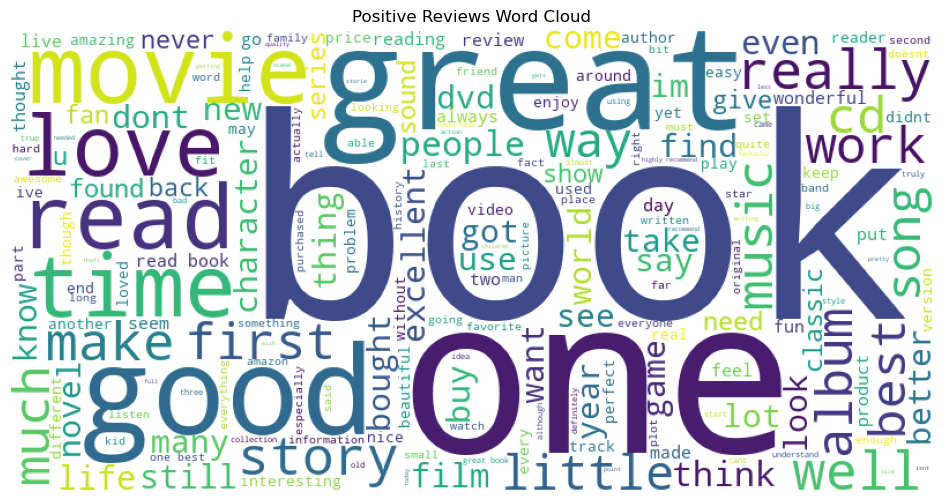

In [25]:
wc_pos = WordCloud(width=800, height=400, background_color='white').generate(" ".join(pos))
plt.figure(figsize=(12,6))
plt.imshow(wc_pos)
plt.axis('off')
plt.title("Positive Reviews Word Cloud")
plt.show()


In [26]:
#                                                                      Negative

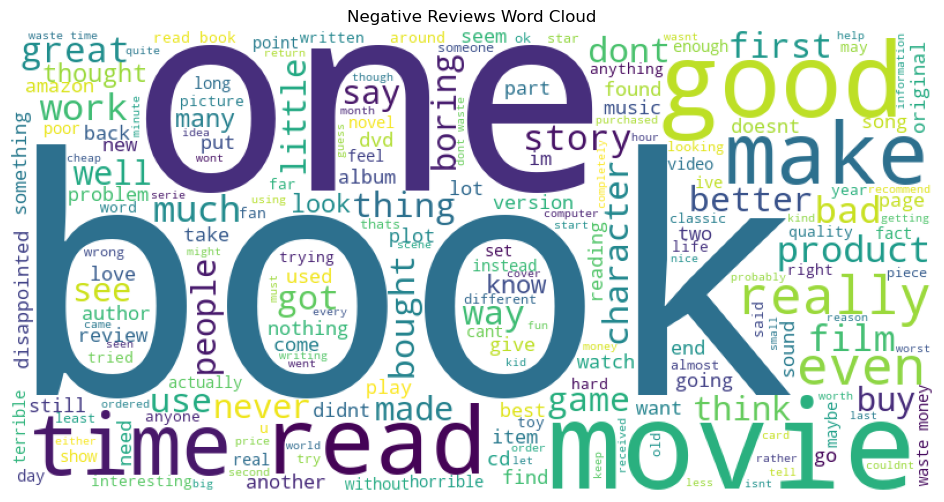

In [27]:
wc_neg = WordCloud(width=800, height=400, background_color='white').generate(" ".join(neg))
plt.figure(figsize=(12,6))
plt.imshow(wc_neg)
plt.axis('off')
plt.title("Negative Reviews Word Cloud")
plt.show()


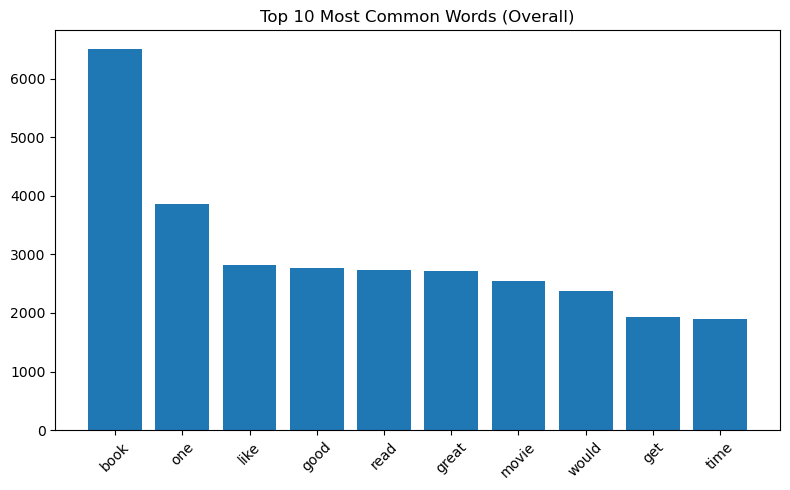

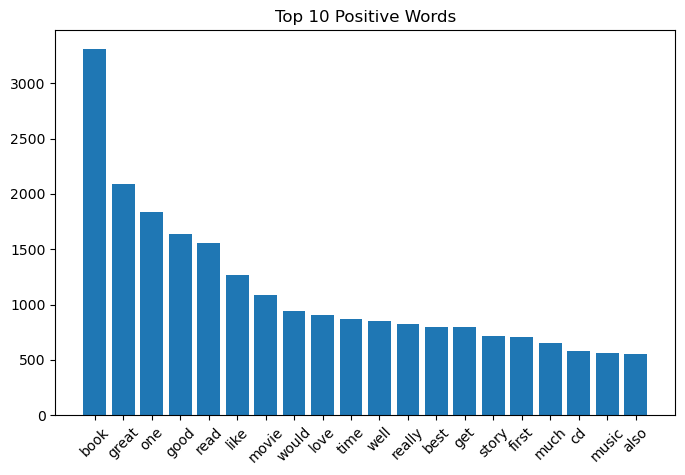

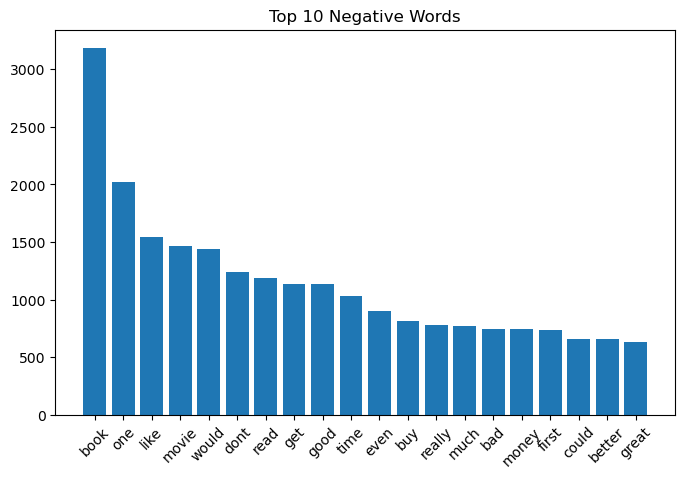

In [29]:
# Bar Plots
# Bar Plot: Top 10 Most Common Words (Overall)
words, counts = zip(*common_words)
plt.figure(figsize=(8,5))
plt.bar(words, counts)
plt.title("Top 10 Most Common Words (Overall)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar Plot: Top 10 Positive Words
pos_words, pos_counts = zip(*top_pos)
plt.figure(figsize=(8,5))
plt.bar(pos_words, pos_counts)
plt.title("Top 10 Positive Words")
plt.xticks(rotation=45)
plt.show()

# Bar Plot: Top 10 Negative Words
neg_words, neg_counts = zip(*top_neg)
plt.figure(figsize=(8,5))
plt.bar(neg_words, neg_counts)
plt.title("Top 10 Negative Words")
plt.xticks(rotation=45)
plt.show()


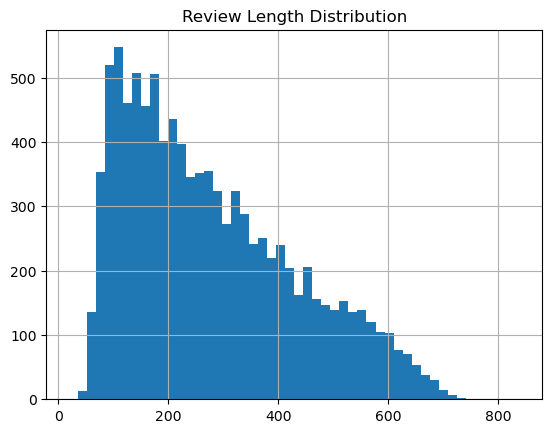

In [30]:
#          Quick Text Stats

df['review_len'] = df['clean_review'].apply(len)

df['review_len'].hist(bins=50)
plt.title("Review Length Distribution")
plt.show()


In [31]:
#    Model Development: Use NLP techniques (TF-IDF, Word2Vec, or BERT embeddings) with models like Logistic Regression, SVM, or Neural Networks.

In [32]:
#   Train–Test Split

from sklearn.model_selection import train_test_split

X = df['clean_review']
y = df['label']   # 'pos' / 'neg'

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [28]:
#                                                      TF - IDF Vectorization Technique

In [29]:
#    TF-IDF Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

X_tfidf = tfidf.fit_transform(df['clean_review'])
y = df['label']

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [30]:
#                                                           Logistic Regression Model

In [31]:
#    Logistic Regression Model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200)
lr.fit(X_train_tfidf, y_train)

y_pred_lr = lr.predict(X_test_tfidf)


In [32]:
#    Evaluation

from sklearn.metrics import classification_report, accuracy_score

print("LR Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


LR Accuracy: 0.854
              precision    recall  f1-score   support

         neg       0.86      0.86      0.86      1019
         pos       0.85      0.85      0.85       981

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



In [33]:
#                                                                        SVM Model

In [34]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)

y_pred_svm = svm.predict(X_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.843
              precision    recall  f1-score   support

         neg       0.85      0.84      0.84      1019
         pos       0.83      0.85      0.84       981

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



In [35]:
#                                                              Neural Network (simple MLP)

In [36]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(128,), max_iter=100)

mlp.fit(X_train_tfidf, y_train)

y_pred_mlp = mlp.predict(X_test_tfidf)

print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


MLP Accuracy: 0.815
              precision    recall  f1-score   support

         neg       0.83      0.81      0.82      1019
         pos       0.80      0.82      0.81       981

    accuracy                           0.81      2000
   macro avg       0.82      0.82      0.81      2000
weighted avg       0.82      0.81      0.82      2000



In [37]:
#                     Validation: Use train/test split, cross-validation, and metrics like accuracy, F1-score.

In [ ]:
#          Train/Test metrics

from sklearn.metrics import accuracy_score, f1_score, classification_report

models = {
    "Logistic Regression": lr,
    "SVM": svm,
    "MLP": mlp
}

from sklearn.model_selection import cross_val_score

for name, model in models.items():
    acc = cross_val_score(model, X_tfidf, y, cv=5, scoring='accuracy').mean()
    f1 = cross_val_score(model, X_tfidf, y, cv=5, scoring='f1_macro').mean()

    print(f"\n{name}")
    print("CV Accuracy:", acc)
    print("CV F1:", f1)



Logistic Regression
CV Accuracy: 0.8446
CV F1: 0.8445066664114623

SVM
CV Accuracy: 0.8392999999999999
CV F1: 0.839226630142392


In [ ]:
'''
Conclusion:
In this project, we developed a sentiment classification model for Amazon product reviews using TF-IDF
text features. Among the evaluated models, SVM and Logistic Regression delivered the highest and most 
consistent performance in terms of accuracy and F1-score, demonstrating strong generalization across 
cross-validation folds. The analysis also highlighted key linguistic patterns in positive and negative
feedback, offering insight into customer opinions. Overall, the TF-IDF–based approach proved effective 
and efficient for large-scale sentiment analysis, with future improvements possible through hyperparameter
tuning and advanced language models such as BERT.
'''